<a href="https://colab.research.google.com/github/Pilcrow3000/pitStopStrategyF1/blob/main/preprocessing/pitStopStrategyF1_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os

# Create the cache directory if it doesn't exist
cache_dir = '/content/drive/MyDrive/FastF1_cache'
os.makedirs(cache_dir, exist_ok=True)

!pip install fastf1
import fastf1 as f1

# caching to gDrive
f1.Cache.enable_cache('/content/drive/MyDrive/FastF1_cache')


Mounted at /content/drive
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.5/150.5 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 kB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 43.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 7.0 MB/s eta 0:00:00
  Attempting uninstall: websockets
    Found existing installation: websockets 14.2
    Uninstalling websockets-14.2:
      Successfully uninstalled websockets-14.2


## Sample for Bahrain 2023 Race to analyze data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


race = f1.get_session(2023, 'Bahrain', 'R')
race.load(telemetry=True)  # Load the session data with telemetry
laps = race.laps        # Access the laps data from the session


core           INFO 	Loading data for Bahrain Grand Prix - Race [v3.5.0]
INFO:fastf1.fastf1.core:Loading data for Bahrain Grand Prix - Race [v3.5.0]
req            INFO 	Using cached data for session_info
INFO:fastf1.fastf1.req:Using cached data for session_info
req            INFO 	Using cached data for driver_info
INFO:fastf1.fastf1.req:Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
INFO:fastf1.fastf1.req:Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
INFO:fastf1.fastf1.req:Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
INFO:fastf1.fastf1.req:Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
INFO:fastf1.fastf1.req:Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
INFO:fastf1.fastf1.req:Using cached data for timing_app_data
core         

In [ ]:
print(laps.head())

                    Time Driver DriverNumber                LapTime  \
0 0 days 01:04:15.902000    VER            1 0 days 00:01:39.019000   
1 0 days 01:05:53.876000    VER            1 0 days 00:01:37.974000   
2 0 days 01:07:31.882000    VER            1 0 days 00:01:38.006000   
3 0 days 01:09:09.858000    VER            1 0 days 00:01:37.976000   
4 0 days 01:10:47.893000    VER            1 0 days 00:01:38.035000   

   LapNumber  Stint PitOutTime PitInTime            Sector1Time  \
0        1.0    1.0        NaT       NaT                    NaT   
1        2.0    1.0        NaT       NaT 0 days 00:00:31.342000   
2        3.0    1.0        NaT       NaT 0 days 00:00:31.388000   
3        4.0    1.0        NaT       NaT 0 days 00:00:31.271000   
4        5.0    1.0        NaT       NaT 0 days 00:00:31.244000   

             Sector2Time  ... FreshTyre             Team  \
0 0 days 00:00:42.414000  ...     False  Red Bull Racing   
1 0 days 00:00:42.504000  ...     False  Red Bull 

In [ ]:
print(laps.info())
print(laps.describe())

<class 'fastf1.core.Laps'>
RangeIndex: 1056 entries, 0 to 1055
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype          
---  ------              --------------  -----          
 0   Time                1056 non-null   timedelta64[ns]
 1   Driver              1056 non-null   object         
 2   DriverNumber        1056 non-null   object         
 3   LapTime             1055 non-null   timedelta64[ns]
 4   LapNumber           1056 non-null   float64        
 5   Stint               1056 non-null   float64        
 6   PitOutTime          50 non-null     timedelta64[ns]
 7   PitInTime           52 non-null     timedelta64[ns]
 8   Sector1Time         1035 non-null   timedelta64[ns]
 9   Sector2Time         1055 non-null   timedelta64[ns]
 10  Sector3Time         1055 non-null   timedelta64[ns]
 11  Sector1SessionTime  1031 non-null   timedelta64[ns]
 12  Sector2SessionTime  1055 non-null   timedelta64[ns]
 13  Sector3SessionTime  1055 non-null   timedelt

In [ ]:
print(laps.isnull().sum())

Time                     0
Driver                   0
DriverNumber             0
LapTime                  1
LapNumber                0
Stint                    0
PitOutTime            1006
PitInTime             1004
Sector1Time             21
Sector2Time              1
Sector3Time              1
Sector1SessionTime      25
Sector2SessionTime       1
Sector3SessionTime       1
SpeedI1                258
SpeedI2                  1
SpeedFL                 53
SpeedST                155
IsPersonalBest           1
Compound                 0
TyreLife                 0
FreshTyre                0
Team                     0
LapStartTime             0
LapStartDate             1
TrackStatus              0
Position                 1
Deleted                  0
DeletedReason            1
FastF1Generated          0
IsAccurate               0
dtype: int64


In [ ]:
print(laps.columns)

Index(['Time', 'Driver', 'DriverNumber', 'LapTime', 'LapNumber', 'Stint',
       'PitOutTime', 'PitInTime', 'Sector1Time', 'Sector2Time', 'Sector3Time',
       'Sector1SessionTime', 'Sector2SessionTime', 'Sector3SessionTime',
       'SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST', 'IsPersonalBest',
       'Compound', 'TyreLife', 'FreshTyre', 'Team', 'LapStartTime',
       'LapStartDate', 'TrackStatus', 'Position', 'Deleted', 'DeletedReason',
       'FastF1Generated', 'IsAccurate'],
      dtype='object')


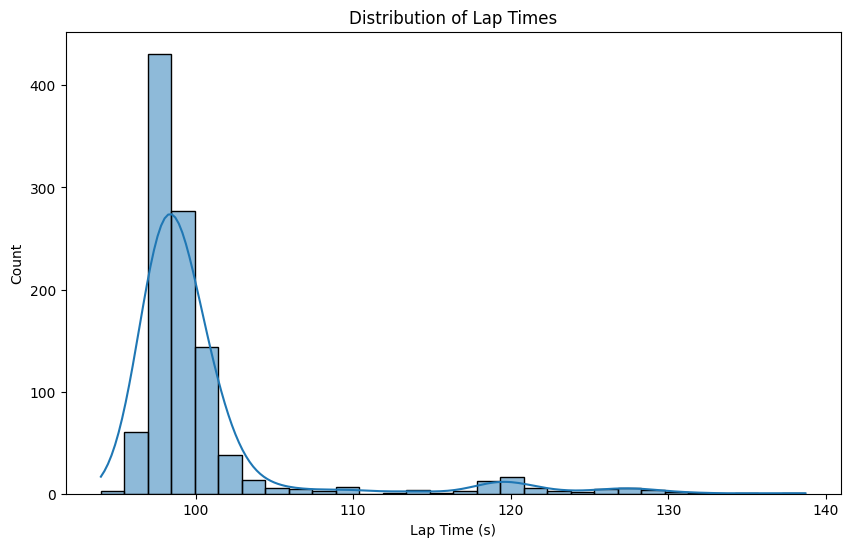

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#Converting lap time to seconds
laps['LapTime_sec'] = laps['LapTime'].dt.total_seconds()

plt.figure(figsize=(10, 6))
sns.histplot(laps['LapTime_sec'], kde=True, bins=30)
plt.xlabel('Lap Time (s)')
plt.title('Distribution of Lap Times')
plt.show()

In [ ]:
pit_in_df = laps[laps['PitInTime'].notna()].copy()
pit_out_df = laps[laps['PitOutTime'].notna()].copy()

pit_in_df['LapNumber'] = pd.to_numeric(pit_in_df['LapNumber'], errors='coerce')
pit_out_df['LapNumber'] = pd.to_numeric(pit_out_df['LapNumber'], errors='coerce')

paired_list = []

for driver, group_in in pit_in_df.groupby('Driver'):
    group_in = group_in.sort_values('LapNumber')

    group_out = pit_out_df[pit_out_df['Driver'] == driver].sort_values('LapNumber')

    if not group_out.empty:
        merged_driver = pd.merge_asof(
            group_in,
            group_out,
            on='LapNumber',
            direction='forward',
            suffixes=('_in', '_out')
        )
        paired_list.append(merged_driver)

paired = pd.concat(paired_list, ignore_index=True)

paired['PitDuration'] = (paired['PitOutTime_out'] - paired['PitInTime_in']).dt.total_seconds()
paired['LapNumber'] = paired['LapNumber'].astype(int)
paired = paired.rename(columns={'Driver_in': 'Driver'})

print(paired[['Driver', 'LapNumber', 'PitDuration']].head(10))

  Driver  LapNumber  PitDuration
0    ALB         11       25.015
1    ALB         26       24.890
2    ALB         40       24.500
3    ALO         14       25.781
4    ALO         34       24.844
5    BOT         11       25.343
6    BOT         29       25.609
7    DEV         11       24.984
8    DEV         27       25.234
9    GAS          9       25.906


## Pre Processing for all Races of 2023

In [ ]:
# Enable caching (adjust the path as needed)
f1.Cache.enable_cache('/content/drive/MyDrive/FastF1_cache')

# List of 2023 race events
races = [
    "Bahrain", "Saudi Arabia", "Australia", "Azerbaijan", "Miami",
    "Emilia Romagna", "Monaco", "Spain", "Canada", "Austria", "Britain",
    "Hungary", "Belgium", "Netherlands", "Italy", "Singapore", "Japan",
    "United States", "Mexico", "Brazil", "Abu Dhabi"
]

all_results = []

for event in races:
    session = f1.get_session(2023, event, 'R')
    session.load(telemetry=True)
    laps = session.laps

    # Filter and sort pit stop events
    pit_in = laps[laps['PitInTime'].notna()].copy()
    pit_out = laps[laps['PitOutTime'].notna()].copy()
    pit_in['LapNumber'] = pd.to_numeric(pit_in['LapNumber'], errors='coerce')
    pit_out['LapNumber'] = pd.to_numeric(pit_out['LapNumber'], errors='coerce')
    pit_in = pit_in.sort_values(['Driver', 'LapNumber'])
    pit_out = pit_out.sort_values(['Driver', 'LapNumber'])

    merged_list = []
    for driver, group in pit_in.groupby('Driver'):
        group = group.sort_values('LapNumber')
        group_out = pit_out[pit_out['Driver'] == driver].sort_values('LapNumber')
        merged = pd.merge_asof(group, group_out, on='LapNumber', direction='forward', suffixes=('_in', '_out'))
        merged_list.append(merged)

    merged_all = pd.concat(merged_list, ignore_index=True)
    merged_all['PitDuration'] = (merged_all['PitOutTime_out'] - merged_all['PitInTime_in']).dt.total_seconds()
    merged_all = merged_all.rename(columns={'Team_in': 'Team'})
    agg = merged_all.groupby('Team').agg({'PitDuration': ['mean', 'count']}).reset_index()
    agg.columns = ['Team', 'AvgPitDuration', 'PitStopCount']
    agg['Event'] = event
    all_results.append(agg)

final_results = pd.concat(all_results, ignore_index=True)
final_results = final_results[['Event', 'Team', 'PitStopCount', 'AvgPitDuration']]

core           INFO 	Loading data for Bahrain Grand Prix - Race [v3.5.0]
INFO:fastf1.fastf1.core:Loading data for Bahrain Grand Prix - Race [v3.5.0]
req            INFO 	Using cached data for session_info
INFO:fastf1.fastf1.req:Using cached data for session_info
req            INFO 	Using cached data for driver_info
INFO:fastf1.fastf1.req:Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
INFO:fastf1.fastf1.req:Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
INFO:fastf1.fastf1.req:Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
INFO:fastf1.fastf1.req:Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
INFO:fastf1.fastf1.req:Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
INFO:fastf1.fastf1.req:Using cached data for timing_app_data
core         

In [ ]:
final_results.to_csv('/content/drive/MyDrive/ML_Project/2023_PitStop_Aggregates.csv', index=False)
print("CSV saved to /content/drive/MyDrive/ML_Project/2023_PitStop_Aggregates.csv")

CSV saved to /content/drive/MyDrive/ML_Project/2023_PitStop_Aggregates.csv


##Adding more useful Data (2021-2023)

In [ ]:
import fastf1 as f1
import pandas as pd

f1.Cache.enable_cache('/content/drive/MyDrive/FastF1_cache')

races = [
    "Bahrain", "Saudi Arabia", "Australia", "Azerbaijan", "Miami",
    "Emilia Romagna", "Monaco", "Spain", "Canada", "Austria", "Britain",
    "Hungary", "Belgium", "Netherlands", "Italy", "Singapore", "Japan",
    "United States", "Mexico", "Brazil", "Abu Dhabi"
]

all_driver_results = []

for event in races:
    session = f1.get_session(2023, event, 'R')
    session.load(telemetry=True)
    laps = session.laps

    pit_in_df = laps[laps['PitInTime'].notna()].copy()
    pit_out_df = laps[laps['PitOutTime'].notna()].copy()
    pit_in_df['LapNumber'] = pd.to_numeric(pit_in_df['LapNumber'], errors='coerce')
    pit_out_df['LapNumber'] = pd.to_numeric(pit_out_df['LapNumber'], errors='coerce')
    pit_in_df = pit_in_df.sort_values(['Driver', 'LapNumber'])
    pit_out_df = pit_out_df.sort_values(['Driver', 'LapNumber'])

    merged_list = []
    for driver, group in pit_in_df.groupby('Driver'):
        group = group.sort_values('LapNumber')
        group_out = pit_out_df[pit_out_df['Driver'] == driver].sort_values('LapNumber')
        merged = pd.merge_asof(group, group_out, on='LapNumber', direction='forward', suffixes=('_in', '_out'))
        merged_list.append(merged)

    merged_all = pd.concat(merged_list, ignore_index=True)
    merged_all['PitDuration'] = (merged_all['PitOutTime_out'] - merged_all['PitInTime_in']).dt.total_seconds()
    merged_all['LapTime_in_sec'] = merged_all['LapTime_in'].dt.total_seconds()

    driver_agg = merged_all.groupby('Driver_in').agg({
        'Team_in': lambda x: x.mode().iloc[0],
        'PitDuration': ['mean', 'sum', 'count'],
        'Compound_in': lambda x: x.mode().iloc[0],
        'TyreLife_in': 'mean',
        'LapTime_in_sec': 'mean'
    }).reset_index()

    driver_agg.columns = ['Driver', 'Team', 'AvgPitDuration', 'TotalPitDuration', 'PitStopCount', 'MostFrequentCompound', 'AvgTyreLife', 'AvgLapTime']
    driver_agg['Event'] = event
    all_driver_results.append(driver_agg)

final_df = pd.concat(all_driver_results, ignore_index=True)
final_df = final_df[['Event', 'Team', 'Driver', 'PitStopCount', 'AvgPitDuration', 'TotalPitDuration', 'MostFrequentCompound', 'AvgTyreLife', 'AvgLapTime']]

core           INFO 	Loading data for Bahrain Grand Prix - Race [v3.5.0]
INFO:fastf1.fastf1.core:Loading data for Bahrain Grand Prix - Race [v3.5.0]
req            INFO 	Using cached data for session_info
INFO:fastf1.fastf1.req:Using cached data for session_info
req            INFO 	Using cached data for driver_info
INFO:fastf1.fastf1.req:Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
INFO:fastf1.fastf1.req:Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
INFO:fastf1.fastf1.req:Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
INFO:fastf1.fastf1.req:Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
INFO:fastf1.fastf1.req:Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
INFO:fastf1.fastf1.req:Using cached data for timing_app_data
core         

In [ ]:
final_df.to_csv('/content/drive/MyDrive/ML_Project/2023_PitStop_Preprocessed.csv', index=False)
print("CSV saved to /content/drive/MyDrive/ML_Project/2023_PitStop_Preprocessed.csv")

CSV saved to /content/drive/MyDrive/ML_Project/2023_PitStop_Preprocessed.csv


In [ ]:
import fastf1 as f1
import pandas as pd

f1.Cache.enable_cache('/content/drive/MyDrive/FastF1_cache')

races = [
    "Bahrain", "Saudi Arabia", "Australia", "Azerbaijan", "Miami",
    "Emilia Romagna", "Monaco", "Spain", "Canada", "Austria", "Britain",
    "Hungary", "Belgium", "Netherlands", "Italy", "Singapore", "Japan",
    "United States", "Mexico", "Brazil", "Abu Dhabi"
]

all_driver_results = []

for event in races:
    session = f1.get_session(2022, event, 'R')
    session.load(telemetry=True)
    laps = session.laps

    pit_in_df = laps[laps['PitInTime'].notna()].copy()
    pit_out_df = laps[laps['PitOutTime'].notna()].copy()
    pit_in_df['LapNumber'] = pd.to_numeric(pit_in_df['LapNumber'], errors='coerce')
    pit_out_df['LapNumber'] = pd.to_numeric(pit_out_df['LapNumber'], errors='coerce')
    pit_in_df = pit_in_df.sort_values(['Driver', 'LapNumber'])
    pit_out_df = pit_out_df.sort_values(['Driver', 'LapNumber'])

    merged_list = []
    for driver, group in pit_in_df.groupby('Driver'):
        group = group.sort_values('LapNumber')
        group_out = pit_out_df[pit_out_df['Driver'] == driver].sort_values('LapNumber')
        merged = pd.merge_asof(group, group_out, on='LapNumber', direction='forward', suffixes=('_in', '_out'))
        merged_list.append(merged)

    merged_all = pd.concat(merged_list, ignore_index=True)
    merged_all['PitDuration'] = (merged_all['PitOutTime_out'] - merged_all['PitInTime_in']).dt.total_seconds()
    merged_all['LapTime_in_sec'] = merged_all['LapTime_in'].dt.total_seconds()

    driver_agg = merged_all.groupby('Driver_in').agg({
        'Team_in': lambda x: x.mode().iloc[0],
        'PitDuration': ['mean', 'sum', 'count'],
        'Compound_in': lambda x: x.mode().iloc[0],
        'TyreLife_in': 'mean',
        'LapTime_in_sec': 'mean'
    }).reset_index()

    driver_agg.columns = ['Driver', 'Team', 'AvgPitDuration', 'TotalPitDuration', 'PitStopCount', 'MostFrequentCompound', 'AvgTyreLife', 'AvgLapTime']
    driver_agg['Event'] = event
    all_driver_results.append(driver_agg)

final_df = pd.concat(all_driver_results, ignore_index=True)
final_df = final_df[['Event', 'Team', 'Driver', 'PitStopCount', 'AvgPitDuration', 'TotalPitDuration', 'MostFrequentCompound', 'AvgTyreLife', 'AvgLapTime']]

core           INFO 	Loading data for Bahrain Grand Prix - Race [v3.5.0]
INFO:fastf1.fastf1.core:Loading data for Bahrain Grand Prix - Race [v3.5.0]
req            INFO 	Using cached data for session_info
INFO:fastf1.fastf1.req:Using cached data for session_info
req            INFO 	Using cached data for driver_info
INFO:fastf1.fastf1.req:Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
INFO:fastf1.fastf1.req:Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
INFO:fastf1.fastf1.req:Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
INFO:fastf1.fastf1.req:Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
INFO:fastf1.fastf1.req:Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
INFO:fastf1.fastf1.req:Using cached data for timing_app_data
core         

In [ ]:
final_df.to_csv('/content/drive/MyDrive/ML_Project/2022_PitStop_Preprocessed.csv', index=False)
print("CSV saved to /content/drive/MyDrive/ML_Project/2022_PitStop_Preprocessed.csv")

CSV saved to /content/drive/MyDrive/ML_Project/2022_PitStop_Preprocessed.csv


In [ ]:
import fastf1 as f1
import pandas as pd

f1.Cache.enable_cache('/content/drive/MyDrive/FastF1_cache')

races = [
    "Bahrain", "Saudi Arabia", "Australia", "Azerbaijan", "Miami",
    "Emilia Romagna", "Monaco", "Spain", "Canada", "Austria", "Britain",
    "Hungary", "Belgium", "Netherlands", "Italy", "Singapore", "Japan",
    "United States", "Mexico", "Brazil", "Abu Dhabi"
]

all_driver_results = []

for event in races:
    session = f1.get_session(2021, event, 'R')
    session.load(telemetry=True)
    laps = session.laps

    pit_in_df = laps[laps['PitInTime'].notna()].copy()
    pit_out_df = laps[laps['PitOutTime'].notna()].copy()
    pit_in_df['LapNumber'] = pd.to_numeric(pit_in_df['LapNumber'], errors='coerce')
    pit_out_df['LapNumber'] = pd.to_numeric(pit_out_df['LapNumber'], errors='coerce')
    pit_in_df = pit_in_df.sort_values(['Driver', 'LapNumber'])
    pit_out_df = pit_out_df.sort_values(['Driver', 'LapNumber'])

    merged_list = []
    for driver, group in pit_in_df.groupby('Driver'):
        group = group.sort_values('LapNumber')
        group_out = pit_out_df[pit_out_df['Driver'] == driver].sort_values('LapNumber')
        merged = pd.merge_asof(group, group_out, on='LapNumber', direction='forward', suffixes=('_in', '_out'))
        merged_list.append(merged)

    merged_all = pd.concat(merged_list, ignore_index=True)
    merged_all['PitDuration'] = (merged_all['PitOutTime_out'] - merged_all['PitInTime_in']).dt.total_seconds()
    merged_all['LapTime_in_sec'] = merged_all['LapTime_in'].dt.total_seconds()

    driver_agg = merged_all.groupby('Driver_in').agg({
        'Team_in': lambda x: x.mode().iloc[0],
        'PitDuration': ['mean', 'sum', 'count'],
        'Compound_in': lambda x: x.mode().iloc[0],
        'TyreLife_in': 'mean',
        'LapTime_in_sec': 'mean'
    }).reset_index()

    driver_agg.columns = ['Driver', 'Team', 'AvgPitDuration', 'TotalPitDuration', 'PitStopCount', 'MostFrequentCompound', 'AvgTyreLife', 'AvgLapTime']
    driver_agg['Event'] = event
    all_driver_results.append(driver_agg)

final_df = pd.concat(all_driver_results, ignore_index=True)
final_df = final_df[['Event', 'Team', 'Driver', 'PitStopCount', 'AvgPitDuration', 'TotalPitDuration', 'MostFrequentCompound', 'AvgTyreLife', 'AvgLapTime']]

core           INFO 	Loading data for Bahrain Grand Prix - Race [v3.5.0]
INFO:fastf1.fastf1.core:Loading data for Bahrain Grand Prix - Race [v3.5.0]
req            INFO 	No cached data found for session_info. Loading data...
INFO:fastf1.fastf1.req:No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
INFO:fastf1.api:Fetching session info data...
req            INFO 	Data has been written to cache!
INFO:fastf1.fastf1.req:Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
INFO:fastf1.fastf1.req:No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
INFO:fastf1.api:Fetching driver list...
req            INFO 	Data has been written to cache!
INFO:fastf1.fastf1.req:Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
INFO:fastf1.fastf1.req:No cached data found for session_status_d

In [ ]:
final_df.to_csv('/content/drive/MyDrive/ML_Project/2021_PitStop_Preprocessed.csv', index=False)
print("CSV saved to /content/drive/MyDrive/ML_Project/2021_PitStop_Preprocessed.csv")

CSV saved to /content/drive/MyDrive/ML_Project/2021_PitStop_Preprocessed.csv
